In [ ]:
!pip install tensorflow-gpu==1.8.0 Keras==2.1.6

In [ ]:
!sudo apt-get install graphviz -y


In [ ]:
!pip install pydot


In [26]:
from keras.utils.vis_utils import model_to_dot
import pydot

import numpy as np
import keras
from keras import backend as K
from keras.layers.core import Dense, Activation
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras.models import Model
from keras.applications import imagenet_utils
from sklearn.metrics import confusion_matrix
from keras.optimizers import Adam, SGD, RMSprop

import itertools
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from IPython.display import SVG


In [3]:
!ls data

downloaded	processed		   test.zip  train	valid
labels.csv.zip	sample_submission.csv.zip  tmp	     train.zip


In [4]:
train_folder = "data/train"
valid_folder = "data/valid"

In [5]:

IMAGE_SIZE=224
BATCH_SIZE=64
NUM_CLASSES=120

In [6]:
!ls data/train/ | head

affenpinscher
afghan_hound
african_hunting_dog
airedale
american_staffordshire_terrier
appenzeller
australian_terrier
basenji
basset
beagle


In [7]:

train_generator = ImageDataGenerator(preprocessing_function=keras.applications.mobilenet.preprocess_input
                                     ,rotation_range=45
                                     ,width_shift_range=0.2
                                     ,height_shift_range=0.2
                                     ,shear_range=0.2
                                     ,zoom_range=0.25
                                     ,horizontal_flip=True
                                     ,fill_mode='nearest'
                                  )

train_batches = train_generator.flow_from_directory(
    train_folder, target_size=(IMAGE_SIZE,IMAGE_SIZE), batch_size=BATCH_SIZE,shuffle=True, seed=13,class_mode='categorical')



valid_generator =  ImageDataGenerator(preprocessing_function=keras.applications.mobilenet.preprocess_input)


valid_batches = valid_generator.flow_from_directory(
    valid_folder, target_size=(IMAGE_SIZE,IMAGE_SIZE), batch_size=BATCH_SIZE)

Found 8178 images belonging to 120 classes.
Found 2044 images belonging to 120 classes.


In [8]:
NUM_CLASSES = train_batches.num_classes

In [9]:
base_model = keras.applications.mobilenet.MobileNet()

In [22]:
?keras.applications.mobilenet.MobileNet()

In [10]:
base_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 226, 226, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (Activation)      (None, 112, 112, 32)      0         
_________________________________________________________________
conv_pad_1 (ZeroPadding2D)   (None, 114, 114, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
__________

In [12]:
x = base_model.layers[-6].output
predictions = Dense(NUM_CLASSES, activation='softmax')(x)

In [13]:
model = Model(inputs=base_model.input, outputs=predictions)


In [14]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 226, 226, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (Activation)      (None, 112, 112, 32)      0         
_________________________________________________________________
conv_pad_1 (ZeroPadding2D)   (None, 114, 114, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
__________

In [15]:
model.layers[:-1]

In [16]:
for layer in base_model.layers:
    layer.trainable = False
    

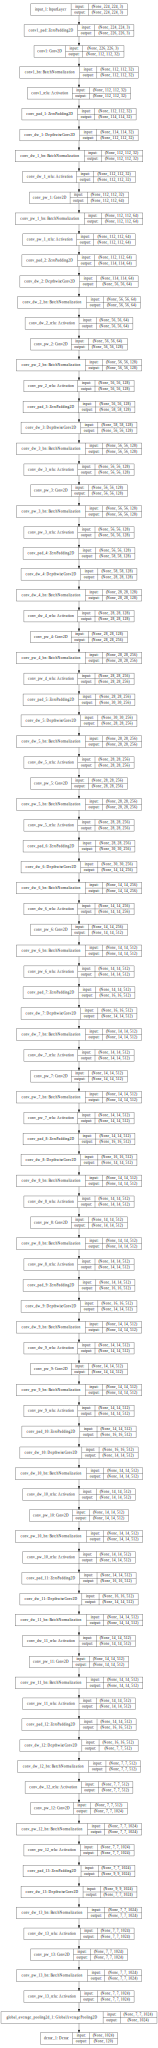

In [17]:
SVG(model_to_dot(model,show_shapes=True, show_layer_names=True).create(prog='dot', format='svg'))


In [18]:
#model.summary()

In [27]:
optimizer = RMSprop(lr=0.001, rho=0.9)

model.compile(optimizer=optimizer, loss='categorical_crossentropy',
              metrics=['accuracy'])

#model.compile(Adam(lr=.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [29]:
model.fit_generator(train_batches, steps_per_epoch=train_batches.n//BATCH_SIZE, 
                    validation_data=valid_batches
                    ,  validation_steps=valid_batches.n // BATCH_SIZE, verbose=2,workers=4, 
                   use_multiprocessing=True
                    , epochs=5
                   
                   )


Epoch 1/5
 - 66s - loss: 0.7511 - acc: 0.7716 - val_loss: 0.9909 - val_acc: 0.7243
Epoch 2/5
 - 66s - loss: 0.7686 - acc: 0.7737 - val_loss: 0.9956 - val_acc: 0.7208
Epoch 3/5
 - 66s - loss: 0.7666 - acc: 0.7680 - val_loss: 0.9769 - val_acc: 0.7248
Epoch 4/5
 - 66s - loss: 0.7295 - acc: 0.7795 - val_loss: 0.9934 - val_acc: 0.7223
Epoch 5/5
 - 65s - loss: 0.7271 - acc: 0.7845 - val_loss: 1.0122 - val_acc: 0.7238


In [31]:
train_batches.class_indices.keys()

dict_keys(['affenpinscher', 'afghan_hound', 'african_hunting_dog', 'airedale', 'american_staffordshire_terrier', 'appenzeller', 'australian_terrier', 'basenji', 'basset', 'beagle', 'bedlington_terrier', 'bernese_mountain_dog', 'black-and-tan_coonhound', 'blenheim_spaniel', 'bloodhound', 'bluetick', 'border_collie', 'border_terrier', 'borzoi', 'boston_bull', 'bouvier_des_flandres', 'boxer', 'brabancon_griffon', 'briard', 'brittany_spaniel', 'bull_mastiff', 'cairn', 'cardigan', 'chesapeake_bay_retriever', 'chihuahua', 'chow', 'clumber', 'cocker_spaniel', 'collie', 'curly-coated_retriever', 'dandie_dinmont', 'dhole', 'dingo', 'doberman', 'english_foxhound', 'english_setter', 'english_springer', 'entlebucher', 'eskimo_dog', 'flat-coated_retriever', 'french_bulldog', 'german_shepherd', 'german_short-haired_pointer', 'giant_schnauzer', 'golden_retriever', 'gordon_setter', 'great_dane', 'great_pyrenees', 'greater_swiss_mountain_dog', 'groenendael', 'ibizan_hound', 'irish_setter', 'irish_terri

In [40]:
train_batches.class_indices

{'affenpinscher': 0,
 'afghan_hound': 1,
 'african_hunting_dog': 2,
 'airedale': 3,
 'american_staffordshire_terrier': 4,
 'appenzeller': 5,
 'australian_terrier': 6,
 'basenji': 7,
 'basset': 8,
 'beagle': 9,
 'bedlington_terrier': 10,
 'bernese_mountain_dog': 11,
 'black-and-tan_coonhound': 12,
 'blenheim_spaniel': 13,
 'bloodhound': 14,
 'bluetick': 15,
 'border_collie': 16,
 'border_terrier': 17,
 'borzoi': 18,
 'boston_bull': 19,
 'bouvier_des_flandres': 20,
 'boxer': 21,
 'brabancon_griffon': 22,
 'briard': 23,
 'brittany_spaniel': 24,
 'bull_mastiff': 25,
 'cairn': 26,
 'cardigan': 27,
 'chesapeake_bay_retriever': 28,
 'chihuahua': 29,
 'chow': 30,
 'clumber': 31,
 'cocker_spaniel': 32,
 'collie': 33,
 'curly-coated_retriever': 34,
 'dandie_dinmont': 35,
 'dhole': 36,
 'dingo': 37,
 'doberman': 38,
 'english_foxhound': 39,
 'english_setter': 40,
 'english_springer': 41,
 'entlebucher': 42,
 'eskimo_dog': 43,
 'flat-coated_retriever': 44,
 'french_bulldog': 45,
 'german_shepherd'

In [41]:
model.save('dog_breed.h5')

In [42]:
with open('labels.txt', 'w') as file_handler:
    for item in train_batches.class_indices.keys():
        file_handler.write("{}\n".format(item))

In [ ]:
tra

In [ ]:
!gsutil cp /home/ubuntu/custom/deeplizrd/dog_breed.h5 gs://np-training-public/

In [ ]:
!pwd

In [ ]:

!ls /home/ubuntu/.kaggle/competitions/dog-breed-identification/train_folder/

